In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import requests
import time
import re

In [2]:
#####1. 데이터 수집######

# 수집기간1(팬데믹: 2022.12.)
columns_to_read = ['언론사', 'URL']
df1 = pd.read_excel('NewsResult_20221201-20221231.xlsx', usecols=columns_to_read)

result_dict1 = df1.groupby('언론사')['URL'].agg(list).to_dict()

joongang1_list = []
hankyure1_list = []
kyunghyang1_list = []
donga1_list = []

# 1) 중앙일보 기사

df_joongang1 = pd.DataFrame(result_dict1['중앙일보'], columns=['url'])

for joongang_url in df_joongang1['url']:
    r = requests.get(joongang_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_body = soup.find('div', attrs = {'id':'article_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        joongang1_list.append(txt_remove_email)
    else:
        joongang1_list.append('None')
        
    time.sleep(1)

df_joongang1['result'] = joongang1_list
df_joongang1.to_excel("joongang_pandemic.xlsx")
    
# 2) 한겨레 기사

df_hankyure1 = pd.DataFrame(result_dict1['한겨레'], columns=['url'])

for hankyure_url in df_hankyure1['url']:
    r = requests.get(hankyure_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = ' '.join(soup.find('div', attrs={'class':'article-text'}).text.split())

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        hankyure1_list.append(txt_remove_email)
    else:
        hankyure1_list.append('None')
        
    time.sleep(1)

df_hankyure1['result'] = hankyure1_list
df_hankyure1.to_excel("hankyure_pandemic.xlsx")
    
    
# 3) 경향신문 기사

df_kyunghyang1 = pd.DataFrame(result_dict1['경향신문'], columns=['url'])

# requests forbidden 문제 해결 코드
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
session = requests.Session()
session.headers.update(headers)

for kyunghyang_url in df_kyunghyang1['url']:
    response = session.get(kyunghyang_url)

    soup = BeautifulSoup(response.text, 'lxml')
    article_body = soup.find('div', attrs = {'class':'art_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)
    
    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        kyunghyang1_list.append(txt_remove_email)
    else:
        kyunghyang1_list.append('None')
    
    time.sleep(1)

df_kyunghyang1['result'] = kyunghyang1_list
df_kyunghyang1.to_excel("kyunghyang_pandemic.xlsx")
    
# 4) 동아일보 기사

df_donga1 = pd.DataFrame(result_dict1['동아일보'], columns=['url'])

for donga_url in df_donga1['url']:
    r = requests.get(donga_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = soup.find('div', attrs = {'id':'article_txt'}).text

   # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        donga1_list.append(txt_remove_email)
    else:
        donga1_list.append('None')
        
    time.sleep(1)

df_donga1['result'] = donga1_list
df_donga1.to_excel("donga_pandemic.xlsx")    

C:\Users\JUNG\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# 수집기간2(엔데믹: 2023.7)
columns_to_read = ['언론사', 'URL']
df2 = pd.read_excel('NewsResult_20230701-20230731.xlsx', usecols=columns_to_read)

result_dict2 = df2.groupby('언론사')['URL'].agg(list).to_dict()

joongang2_list = []
hankyure2_list = []
kyunghyang2_list = []
donga2_list = []

# 1) 중앙일보 기사

df_joongang2 = pd.DataFrame(result_dict2['중앙일보'], columns=['url'])

for joongang_url in result_dict2['중앙일보']:
    r = requests.get(joongang_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_body = soup.find('div', attrs = {'id':'article_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        joongang2_list.append(txt_remove_email)
    else:
        joongang2_list.append('None')
        
    time.sleep(2)

df_joongang2['result'] = joongang2_list
df_joongang2.to_excel("joongang_endemic.xlsx")
    
# 2) 한겨레 기사

df_hankyure2 = pd.DataFrame(result_dict2['한겨레'], columns=['url'])

for hankyure_url in df_hankyure2['url']:
    r = requests.get(hankyure_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = ' '.join(soup.find('div', attrs={'class':'article-text'}).text.split())

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        hankyure2_list.append(txt_remove_email)
    else:
        hankyure2_list.append('None')
        
    time.sleep(1)

df_hankyure2['result'] = hankyure2_list
df_hankyure2.to_excel("hankyure_endemic.xlsx")
    
    
# 3) 경향신문 기사

df_kyunghyang2 = pd.DataFrame(result_dict2['경향신문'], columns=['url'])

# requests forbidden 문제 해결
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
session = requests.Session()
session.headers.update(headers)

for kyunghyang_url in df_kyunghyang2['url']:
    response = session.get(kyunghyang_url)

    soup = BeautifulSoup(response.text, 'lxml')
    article_body = soup.find('div', attrs = {'class':'art_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)
    
    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        kyunghyang2_list.append(txt_remove_email)
    else:
        kyunghyang2_list.append('None')
    
    time.sleep(1)

df_kyunghyang2['result'] = kyunghyang2_list
df_kyunghyang2.to_excel("kyunghyang_endemic.xlsx")
    
# 4) 동아일보 기사

df_donga2 = pd.DataFrame(result_dict2['동아일보'], columns=['url'])

for donga_url in df_donga2['url']:
    r = requests.get(donga_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = soup.find('div', attrs = {'id':'article_txt'}).text

   # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        donga2_list.append(txt_remove_email)
    else:
        donga2_list.append('None')
        
    time.sleep(1)

df_donga2['result'] = donga2_list
df_donga2.to_excel("donga_endemic.xlsx")    

C:\Users\JUNG\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
import re
from collections import Counter

In [5]:
##### 2. 한글 전처리######

kiwi = Kiwi()
stopwords_dict = Stopwords()

# 불용어 사용자 정의

customized_stopwords = ['올해', '지난해', '내년', '이후', '상반기', '하반기', '기자', '사진']
for word in customized_stopwords:
    stopwords_dict.add((word, 'NNG')) 
    
customized_stopwords = ['연합뉴스', '중앙일보', '동아일보', '한겨레', '경향신문']
for word in customized_stopwords:
    stopwords_dict.add((word, 'NNP'))

In [6]:
def list_to_string(media_list):
    media_string =' '.join(media_list) 
    return media_string

In [74]:
total_list = []

In [101]:
political_map = {
    '한겨레':'진보', 
    '경향':'진보',
    '중앙':'보수',
    '동아':'보수'
}
from collections import defaultdict
political_result = defaultdict(lambda: defaultdict(list))

In [102]:
political_result

defaultdict(<function __main__.<lambda>()>, {})

In [104]:
df_joongang1 = pd.read_excel('joongang_pandemic.xlsx',index_col=0)
joongang1_list = df_joongang1['result'].values.tolist()
total_list.append(['중앙',joongang1_list, '팬데믹'])
political_result[political_map['중앙']]['팬데믹'].extend(joongang1_list)

df_donga1 = pd.read_excel('donga_pandemic.xlsx',index_col=0)
donga1_list = df_donga1['result'].values.tolist()
total_list.append(['동아',donga1_list, '팬데믹'])
political_result[political_map['동아']]['팬데믹'].extend(donga1_list)

df_hankyure1 = pd.read_excel('hankyure_pandemic.xlsx',index_col=0)
hankyure1_list = df_hankyure1['result'].values.tolist()
total_list.append(['한겨레', hankyure1_list, '팬데믹'])
political_result[political_map['한겨레']]['팬데믹'].extend(hankyure1_list)

df_kyunghyang1 = pd.read_excel('kyunghyang_pandemic.xlsx',index_col=0)
kyunghyang1_list = df_kyunghyang1['result'].values.tolist()
total_list.append(['경향',kyunghyang1_list, '팬데믹'])
political_result[political_map['경향']]['팬데믹'].extend(kyunghyang1_list)

df_joongang2 = pd.read_excel('joongang_endemic.xlsx',index_col=0)
joongang2_list = df_joongang2['result'].values.tolist()
total_list.append(['중앙', joongang2_list, '엔데믹'])
political_result[political_map['중앙']]['엔데믹'].extend(joongang2_list)

df_donga2 = pd.read_excel('donga_endemic.xlsx',index_col=0)
donga2_list = df_donga2['result'].values.tolist()
total_list.append(['동아', donga2_list, '엔데믹'])
political_result[political_map['동아']]['엔데믹'].extend(donga2_list)

df_hankyure2 = pd.read_excel('hankyure_endemic.xlsx',index_col=0)
hankyure2_list = df_hankyure2['result'].values.tolist()
total_list.append(['한겨레',hankyure2_list, '엔데믹'])
political_result[political_map['한겨레']]['엔데믹'].extend(hankyure2_list)

df_kyunghyang2 = pd.read_excel('kyunghyang_endemic.xlsx',index_col=0)
kyunghyang2_list = df_kyunghyang2['result'].values.tolist()
total_list.append(['경향', kyunghyang2_list, '엔데믹'])
political_result[political_map['경향']]['엔데믹'].extend(kyunghyang2_list)

In [105]:
for political_type, text_list in political_result.items():
    total_list.append([political_type, text_list['팬데믹'], '팬데믹'])
    total_list.append([political_type, text_list['엔데믹'], '엔데믹'])

In [106]:
result = []
for item in total_list:
    name, text_list, period = item
    string_result = list_to_string(text_list)
    selected_result = select_words(10, string_result)
    result.append([name, ', '.join(selected_result), period])

In [107]:
result_df = pd.DataFrame(result, columns=['name','top_freq','period'])

In [109]:
result_df

,name,top_freq,period
0,중앙,,팬데믹
1,동아,,팬데믹
2,한겨레,,팬데믹
3,경향,,팬데믹
4,중앙,,엔데믹
5,동아,,엔데믹
6,한겨레,,엔데믹
7,경향,,엔데믹
8,보수,,팬데믹
9,보수,,엔데믹


In [108]:
pivot_result = result_df.pivot(index='name',columns='period', values='top_freq', sort=False)

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
pivot_result

In [8]:
j1_string = list_to_string(joongang1_list) #중앙일보 팬데믹
j2_string = list_to_string(joongang2_list) #중아일보 엔데믹
d1_string = list_to_string(donga1_list) #동아일보 팬데믹
d2_string = list_to_string(donga2_list) #동아일보 엔데믹
h1_string = list_to_string(hankyure1_list) #한겨레 팬데믹
h2_string = list_to_string(hankyure2_list) #한겨레 엔데믹
k1_string = list_to_string(kyunghyang1_list) #경향신문 팬데믹
k2_string = list_to_string(kyunghyang2_list) #경향신문 엔데믹
con1_string = list_to_string(joongang1_list+donga1_list) #보수성향 신문 팬데믹
con2_string = list_to_string(joongang2_list+donga2_list) #보수성향 신문 엔데믹
lib1_string = list_to_string(hankyure1_list+kyunghyang1_list) #진보성향 신문 팬데믹
lib2_string = list_to_string(hankyure2_list+kyunghyang2_list) #진보성향 신문 엔데믹

In [59]:
def preprocessing(media_string):
        
    filtered_content = re.sub(r'[^\s\w\d]', '', media_string)
    kiwi_tokens = kiwi.tokenize(filtered_content, stopwords = stopwords_dict) 
    noun_words = []
    for token in kiwi_tokens:
        if 'NN' in token.tag:
            noun_words.append(token.form)
        
    final_noun_words = []
    for word in noun_words:
        if len(word) > 1:
            final_noun_words.append(word)
        
    return final_noun_words

In [10]:
def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words

In [11]:
def select_words(K, media_string):
    c = Counter(preprocessing(media_string))
    selected_words = get_words(c.most_common(K))
    return selected_words

In [12]:
#### 3.빈도 분석 ####

# 1) 매체별 상위10개 키워드 분석
# Q> 표로 추출해서 볼 수 있을까?

j1_w = select_words(10, j1_string)
j2_w = select_words(10, j2_string)
d1_w = select_words(10, d1_string)
d2_w = select_words(10, d2_string)
h1_w = select_words(10, h1_string)
h2_w = select_words(10, h2_string)
k1_w = select_words(10, k1_string)
k2_w = select_words(10, k2_string)
con1_w = select_words(10, con1_string)
con2_w = select_words(10, con2_string)
lib1_w = select_words(10, lib1_string)
lib2_w = select_words(10, lib2_string)

In [14]:
j1_w

['중국', '코로나', '방역', '감염', '검사', '정부', '상황', '확진자', '정책', '미국']

In [15]:
j2_w

['코로나', '북한', '병원', '증가', '중국', '마스크', '저축', '가계', '유행', '교수']

In [16]:
d1_w

['코로나', '중국', '확진자', '정부', '발표', '바이러스', '델타', '항공', '감염', '접종']

In [17]:
d2_w

['코로나', '확진자', '의원', '바이러스', '마스크', '증가', '여객', '초선', '위원장', '접종']

In [18]:
h1_w

['코로나', '중국', '확진자', '백신', '베이징', '방역', '치명', '감염', '접종', '정책']

In [19]:
h2_w

['코로나', '백신', '정부', '격리', '학생', '급식', '제공', '의료', '소송', '간호사']

In [20]:
k1_w

['코로나', '중국', '방역', '검사', '정책', '감염', '완화', '조치', '감염자', '당국']

In [21]:
k2_w

['코로나', '중국', '의원', '위원장', '상반기', '초선', '증가', '발생', '질환', '이상']

In [22]:
con1_w

['코로나', '중국', '확진자', '정부', '감염', '방역', '검사', '발표', '상황', '베이징']

In [23]:
con2_w

['코로나', '증가', '마스크', '확진자', '병원', '북한', '중국', '유행', '바이러스', '의원']

In [24]:
lib1_w

['코로나', '중국', '방역', '확진자', '검사', '감염', '정책', '베이징', '감염자', '완화']

In [25]:
lib2_w

['코로나', '중국', '위원장', '의원', '초선', '상반기', '증가', '발생', '접종', '감염병']

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [27]:
# 2) 워드클라우드

def wordcloud(media_string):
    final_noun_words = preprocessing(media_string)
    cleaned_words =' '.join(final_noun_words)
    wc = WordCloud(font_path='malgun', background_color='white', repeat=True) 
    wc.generate(cleaned_words)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()
    wc.to_file('j1'+'.png') # Q > 함수에 투입하는 데이터별로 파일명 따로 지정하는 방법이 있을까?

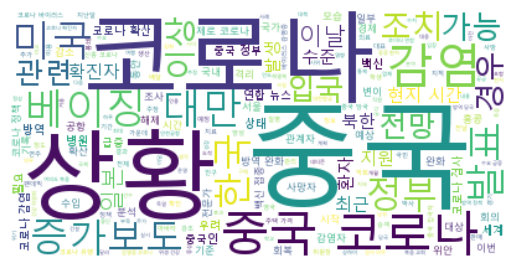

In [28]:
wordcloud(j1_string) # Q> 워드클라우드와 상위10개 단어 불일치

In [29]:
j1_string

'                  글=중앙일보 논설실\xa0 그림=고혜경 프리랜서    ※이번 회를 끝으로 당분간 그림사설 중단합니다. 새로운 오피니언 콘텐트로 찾아뵙겠습니다.   국민의힘 주호영 원내대표가 30일 오후 경기 연천군 육군 제5보병사단 수색대대에서 장비를 보며 설명을 듣고 있다. 연합뉴스    국민의힘이 중국 관련 현안에 잇따라 강경 발언을 쏟아내고 있다. 중국발 코로나19 재확산 위기에 강력 대응을 주문하는 한편 한국 내 ‘중국 비밀경찰서’ 의혹에 대해서도 비판 목소리를 키우고 있다.    주호영 원내대표는 30일 원내대책회의에서\xa0“코로나가 처음 우리나라에 확산될 때 전문가들이 7차례에 걸쳐서 중국발 입국을 막는 게 최선의 방법이라고 했지만 문재인 정부는 이 말을 받아들이지 않아 창궐했다”며\xa0“지난번 실패를 거울삼아 이번에는 중국발 코로나 확산에 실패가 없도록 단단히 대응 해달라”고 말했다.    정부는 이날 ▶중국발 입국자의 입국 전후 코로나19 유전자증폭(PCR) 검사 의무화 ▶중국발 항공기 추가 증편 잠정 중단 ▶인천공항으로 도착지 일원화 ▶중국인 단기비자 제한 등의 중국발 코로나 확산 방지 대책을 발표했다. 주 원내대표는 이에 대해\xa0“다른 나라보다 더 강한 대책”이라고 강조했다. 전날 중국 외교부가 “각국의 방역 조치는 각국 국민에게 차별이 없어야 한다”는 공식 입장을 발표했지만, 당·정이 이에 아랑곳하지 않고 한목소리로 선제적 대응에 착수한 것이다.    전날부터 국민의힘 내부에선 중국인 여행자 입국에 대한 정부의 대응을 요구하는 목소리가 컸다. 당권 주자로 꼽히는 유승민 전 의원이 페이스북에 “중국 정부가 코로나 봉쇄를 풀고 확진자 통계 발표도 중단한 이후 감염자는 폭증하고 있고, 한국행 여행객도 증가할 것”이라며 “미국·일본·인도·이탈리아 등 여러 나라가 중국발 입국자에 대한 코로나 전수검사 등 조치를 강화하고 있다”는 글을 올렸다. 정진석 국민의힘 비상대책위원장이 29일 오전 서울 여의도 국회에서 열린 비대위회의에

In [30]:
#### 4. 네트워크 분석 ####

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import networkx as nx
def construct_network(text):
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
    DTM_tf = vectorizer.fit_transform(text)
    feature_names = vectorizer.get_feature_names_out()
    DTM = np.array(DTM_tf.todense())
    DTM_binary = np.sign(DTM)
    words_cooccurrence = np.dot(DTM_binary.T, DTM_binary)
    np.fill_diagonal(words_cooccurrence, 0)
    #print(feature_names) # 네트워크를 구성하는 단어 출력하기
    #print(words_cooccurrence) # 단어들 간의 인접행렬 출력하기
    g = nx.convert_matrix.from_numpy_array(words_cooccurrence)
    mapping = {}
    for k, word in enumerate(feature_names):
        mapping[k]=word
    g1 = nx.relabel_nodes(g, mapping)
    return g1

In [31]:
def get_text_network(media_list, selected_words):
    cleaned_articles = [preprocessing(article) for article in media_list] # Q> 오류. expected string or bytes-like object, got 'list'
    new_docs=[]
    for article in cleaned_articles:
        new_doc=[]
        for word in article:
            if word in selected_words:
                new_doc.append(word)
        if len(new_doc)>1:
            new_docs.append(' '.join(new_doc))
    return construct_network(new_docs)

In [32]:
j1_nw = get_text_network(joongang1_list, j1_w)

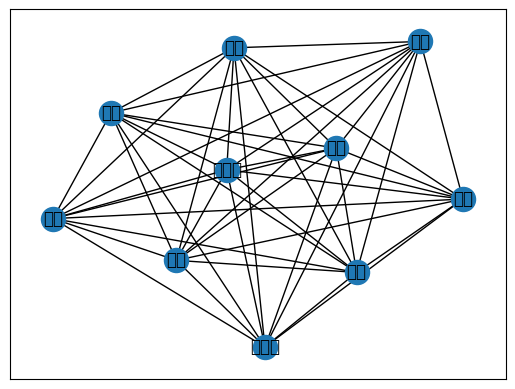

In [36]:
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
nx.draw_networkx(j1_nw)
plt.show()
nx.write_graphml(j1_nw, '중앙일보 팬데믹.graphml')